In [1]:
# Example : Eigenfaces

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

In [7]:
import matplotlib.pyplot as plt

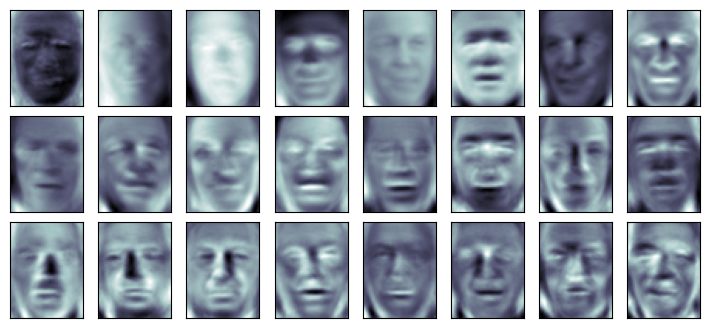

In [8]:
fig, axes = plt.subplots(3, 8, figsize=(9,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

In [9]:
# Lets look at the cumulative variance of these components to see how much of the data
# information projection is preserving

In [10]:
import numpy as np

Text(0, 0.5, 'cumulative explained variance')

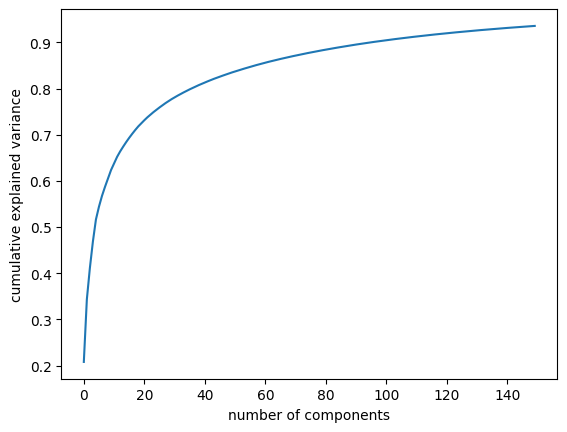

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [12]:
# We see that 150 components accounts for just 90% of the variance.
# that would lead us to believe that using 150 components
# we would recover most of the essential charachteristics of the data

In [14]:
# compute the components and projected faces
pca = PCA(n_components=150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

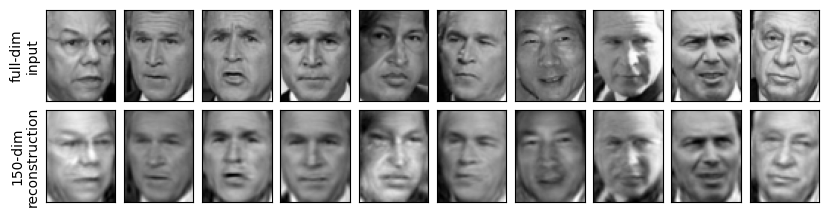

In [15]:
# plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

In [ ]:
# PCA's main weakness is that it tends to be highly affected by the outliers in the data